ДЕТАЛЬНЫЙ АНАЛИЗ ТАБЛИЦЫ BLACKOUTS
Всего записей в таблице: 25,264

1. ПРОВЕРКА КАЧЕСТВА ДАННЫХ
🔍 Дубликаты по ID: 0
🔍 Полные дубликаты (все поля): 0

📊 Пропущенные значения:
   source: 16542 пропущенных значений (65.5%)

📈 Уникальные значения по столбцам:
   id: 25264 уникальных значений
   start_date: 19739 уникальных значений
   end_date: 7941 уникальных значений
   description: 3549 уникальных значений
   type: 4 уникальных значений
   initiator_name: 369 уникальных значений
   source: 252 уникальных значений

2. ПРЕОБРАЗОВАНИЕ ДАТ И РАСЧЕТ ДЛИТЕЛЬНОСТИ
⚠️ Записи с проблемными датами: 0

3. АНАЛИЗ ТИПОВ АВАРИЙ
📋 Распределение по типам отключений:
   ▸ hot_water: 9,339 (37.0%)
   ▸ cold_water: 9,109 (36.1%)
   ▸ electricity: 4,745 (18.8%)
   ▸ heat: 2,071 (8.2%)

4. АНАЛИЗ ИСТОЧНИКОВ ИНФОРМАЦИИ
📰 Топ-10 источников информации:
   ▸ Аварийная служба ООО "Владстрой": 866 (3.4%)
   ▸ Единая дежурная диспетчерская служба города: 731 (2.9%)
   ▸ Аварийная служба ООО "АРСО-71": 618 (2.4%)


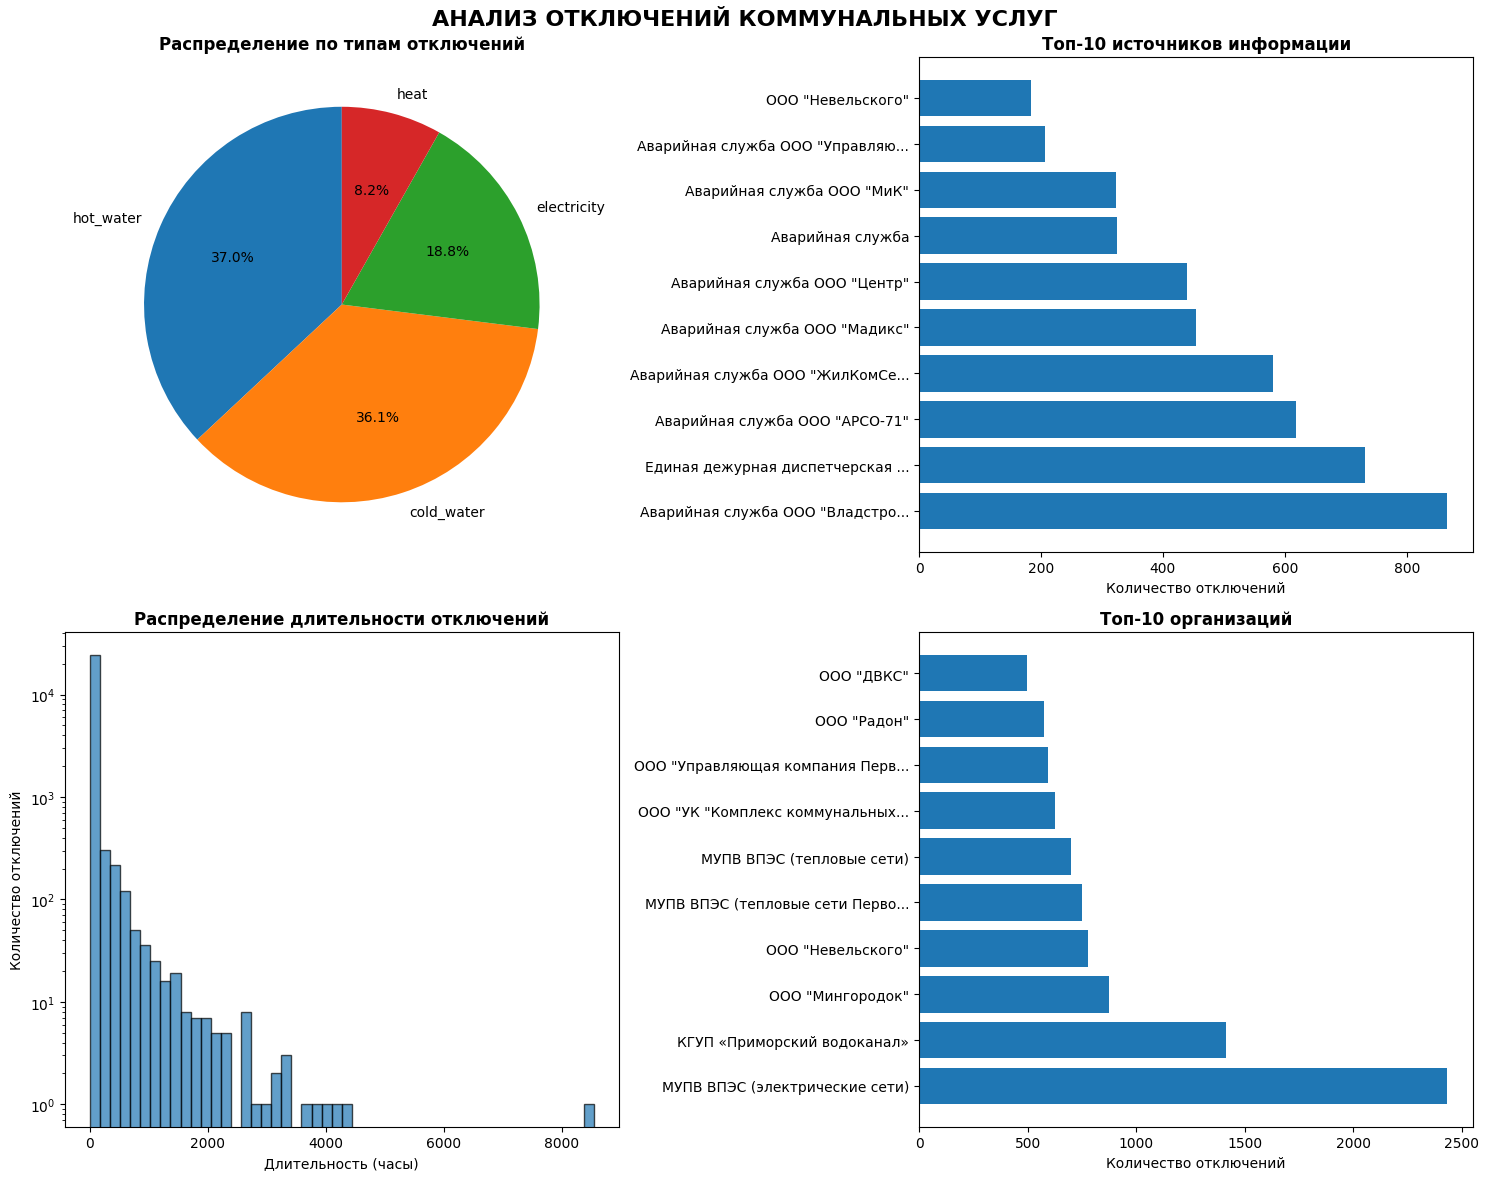


9. СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
                         Метрика Значение
                   Всего записей   25,264
                   Уникальных ID   25,264
                    Дубликаты ID        0
                 Типы отключений        4
            Источники информации      252
                     Организации      369
             Уникальные описания    3,549
     Записи с корректными датами   25,264
     Средняя длительность (часы)    31.23
Максимальная длительность (часы)  8543.22
 Минимальная длительность (часы)     0.02

АНАЛИЗ ЗАВЕРШЕН!


In [1]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Подключение к базе данных
conn = sqlite3.connect('baseFP.db')

print("=" * 80)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ТАБЛИЦЫ BLACKOUTS")
print("=" * 80)

# Загружаем данные из таблицы blackouts
blackouts_df = pd.read_sql_query("SELECT * FROM blackouts", conn)

print(f"Всего записей в таблице: {len(blackouts_df):,}")

# 1. ПРОВЕРКА НА ДУБЛИКАТЫ И ПРОБЛЕМЫ
print("\n" + "=" * 50)
print("1. ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
print("=" * 50)

# Проверка дубликатов по ID
duplicate_ids = blackouts_df.duplicated(subset=['id']).sum()
print(f"🔍 Дубликаты по ID: {duplicate_ids}")

# Проверка дубликатов по всем полям
full_duplicates = blackouts_df.duplicated().sum()
print(f"🔍 Полные дубликаты (все поля): {full_duplicates}")

# Проверка пропущенных значений
print("\n📊 Пропущенные значения:")
missing_data = blackouts_df.isnull().sum()
for col, count in missing_data.items():
    if count > 0:
        print(f"   {col}: {count} пропущенных значений ({count/len(blackouts_df)*100:.1f}%)")

# Проверка уникальных значений
print("\n📈 Уникальные значения по столбцам:")
for col in blackouts_df.columns:
    unique_count = blackouts_df[col].nunique()
    print(f"   {col}: {unique_count} уникальных значений")

# 2. ПРЕОБРАЗОВАНИЕ ДАТ И РАСЧЕТ ДЛИТЕЛЬНОСТИ
print("\n" + "=" * 50)
print("2. ПРЕОБРАЗОВАНИЕ ДАТ И РАСЧЕТ ДЛИТЕЛЬНОСТИ")
print("=" * 50)

# Преобразование текстовых дат в datetime
blackouts_df['start_date_dt'] = pd.to_datetime(blackouts_df['start_date'], errors='coerce')
blackouts_df['end_date_dt'] = pd.to_datetime(blackouts_df['end_date'], errors='coerce')

# Расчет длительности в часах
blackouts_df['duration_hours'] = (blackouts_df['end_date_dt'] - blackouts_df['start_date_dt']).dt.total_seconds() / 3600

# Проверка проблемных дат
date_problems = blackouts_df[blackouts_df['duration_hours'].isna() | (blackouts_df['duration_hours'] < 0)]
print(f"⚠️ Записи с проблемными датами: {len(date_problems)}")

# Удаляем проблемные записи для анализа длительности
clean_blackouts = blackouts_df[(blackouts_df['duration_hours'].notna()) & (blackouts_df['duration_hours'] >= 0)]

# 3. АНАЛИЗ ТИПОВ АВАРИЙ
print("\n" + "=" * 50)
print("3. АНАЛИЗ ТИПОВ АВАРИЙ")
print("=" * 50)

type_analysis = blackouts_df['type'].value_counts()
print("📋 Распределение по типам отключений:")
for type_name, count in type_analysis.items():
    percentage = (count / len(blackouts_df)) * 100
    print(f"   ▸ {type_name or 'Не указано'}: {count:,} ({percentage:.1f}%)")

# 4. АНАЛИЗ ИСТОЧНИКОВ ИНФОРМАЦИИ
print("\n" + "=" * 50)
print("4. АНАЛИЗ ИСТОЧНИКОВ ИНФОРМАЦИИ")
print("=" * 50)

source_analysis = blackouts_df['source'].value_counts().head(10)
print("📰 Топ-10 источников информации:")
for source, count in source_analysis.items():
    percentage = (count / len(blackouts_df)) * 100
    print(f"   ▸ {source or 'Не указано'}: {count:,} ({percentage:.1f}%)")

# 5. АНАЛИЗ ОРГАНИЗАЦИЙ
print("\n" + "=" * 50)
print("5. АНАЛИЗ ОРГАНИЗАЦИЙ, ПРОВОДЯЩИХ РАБОТЫ")
print("=" * 50)

initiator_analysis = blackouts_df['initiator_name'].value_counts().head(10)
print("🏢 Топ-10 организаций, проводящих работы:")
for initiator, count in initiator_analysis.items():
    percentage = (count / len(blackouts_df)) * 100
    print(f"   ▸ {initiator or 'Не указано'}: {count:,} ({percentage:.1f}%)")

# 6. АНАЛИЗ ДЛИТЕЛЬНОСТИ ОТКЛЮЧЕНИЙ
print("\n" + "=" * 50)
print("6. АНАЛИЗ ДЛИТЕЛЬНОСТИ ОТКЛЮЧЕНИЙ")
print("=" * 50)

if len(clean_blackouts) > 0:
    duration_stats = clean_blackouts['duration_hours'].describe()
    
    print(f"⏱️ САМОЕ КОРОТКОЕ ОТКЛЮЧЕНИЕ: {duration_stats['min']:.2f} часов")
    print(f"⏱️ САМОЕ ДЛИННОЕ ОТКЛЮЧЕНИЕ: {duration_stats['max']:.2f} часов")
    print(f"📊 СРЕДНЯЯ ДЛИТЕЛЬНОСТЬ: {duration_stats['mean']:.2f} часов")
    print(f"📊 МЕДИАННАЯ ДЛИТЕЛЬНОСТЬ: {duration_stats['50%']:.2f} часов")
    print(f"📊 СТАНДАРТНОЕ ОТКЛОНЕНИЕ: {duration_stats['std']:.2f} часов")
    
    # Детали самого длинного отключения
    longest_outage = clean_blackouts.loc[clean_blackouts['duration_hours'].idxmax()]
    print(f"\n🔍 САМОЕ ДЛИННОЕ ОТКЛЮЧЕНИЕ (детали):")
    print(f"   Длительность: {longest_outage['duration_hours']:.2f} часов")
    print(f"   Тип: {longest_outage['type']}")
    print(f"   Начало: {longest_outage['start_date']}")
    print(f"   Конец: {longest_outage['end_date']}")
    print(f"   Организация: {longest_outage['initiator_name']}")
    print(f"   Описание: {longest_outage['description'][:100]}...")
    
    # Детали самого короткого отключения
    shortest_outage = clean_blackouts.loc[clean_blackouts['duration_hours'].idxmin()]
    print(f"\n🔍 САМОЕ КОРОТКОЕ ОТКЛЮЧЕНИЕ (детали):")
    print(f"   Длительность: {shortest_outage['duration_hours']:.2f} часов")
    print(f"   Тип: {shortest_outage['type']}")
    print(f"   Начало: {shortest_outage['start_date']}")
    print(f"   Конец: {shortest_outage['end_date']}")
    print(f"   Организация: {shortest_outage['initiator_name']}")
else:
    print("❌ Нет данных для анализа длительности")

# 7. АНАЛИЗ ОПИСАНИЙ
print("\n" + "=" * 50)
print("7. АНАЛИЗ ОПИСАНИЙ АВАРИЙ")
print("=" * 50)

# Уникальные описания
unique_descriptions = blackouts_df['description'].nunique()
print(f"📝 Уникальных описаний: {unique_descriptions:,}")

# Самые частые описания
common_descriptions = blackouts_df['description'].value_counts().head(5)
print("\n📊 Самые частые описания:")
for desc, count in common_descriptions.items():
    if pd.notna(desc):
        print(f"   ▸ '{desc[:80]}{'...' if len(str(desc)) > 80 else ''}': {count:,}")

# Анализ ключевых слов в описаниях
if len(clean_blackouts) > 0:
    descriptions = clean_blackouts['description'].dropna().str.lower()
    
    keywords = {
        'авария': 'авария',
        'ремонт': 'ремонт',
        'восстан': 'восстановительные работы',
        'планов': 'плановые работы',
        'профилакт': 'профилактические работы'
    }
    
    print("\n🔍 Ключевые слова в описаниях:")
    for keyword, label in keywords.items():
        count = descriptions.str.contains(keyword, na=False).sum()
        if count > 0:
            percentage = (count / len(descriptions)) * 100
            print(f"   ▸ {label}: {count:,} ({percentage:.1f}%)")

# 8. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\n" + "=" * 50)
print("8. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 50)

# Создаем графики
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('АНАЛИЗ ОТКЛЮЧЕНИЙ КОММУНАЛЬНЫХ УСЛУГ', fontsize=16, fontweight='bold')

# График 1: Распределение по типам отключений
type_counts = blackouts_df['type'].value_counts()
axes[0, 0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Распределение по типам отключений', fontweight='bold')

# График 2: Топ-10 источников информации
source_counts = blackouts_df['source'].value_counts().head(10)
axes[0, 1].barh(range(len(source_counts)), source_counts.values)
axes[0, 1].set_yticks(range(len(source_counts)))
axes[0, 1].set_yticklabels([s[:30] + '...' if len(s) > 30 else s for s in source_counts.index])
axes[0, 1].set_title('Топ-10 источников информации', fontweight='bold')
axes[0, 1].set_xlabel('Количество отключений')

# График 3: Распределение длительности отключений (логарифмическая шкала)
if len(clean_blackouts) > 0:
    durations = clean_blackouts['duration_hours']
    positive_durations = durations[durations > 0]
    if len(positive_durations) > 0:
        axes[1, 0].hist(positive_durations, bins=50, edgecolor='black', alpha=0.7)
        axes[1, 0].set_xlabel('Длительность (часы)')
        axes[1, 0].set_ylabel('Количество отключений')
        axes[1, 0].set_title('Распределение длительности отключений', fontweight='bold')
        axes[1, 0].set_yscale('log')

# График 4: Топ-10 организаций
initiator_counts = blackouts_df['initiator_name'].value_counts().head(10)
axes[1, 1].barh(range(len(initiator_counts)), initiator_counts.values)
axes[1, 1].set_yticks(range(len(initiator_counts)))
axes[1, 1].set_yticklabels([i[:30] + '...' if len(i) > 30 else i for i in initiator_counts.index])
axes[1, 1].set_title('Топ-10 организаций', fontweight='bold')
axes[1, 1].set_xlabel('Количество отключений')

plt.tight_layout()
plt.show()

# 9. СВОДНАЯ ТАБЛИЦА
print("\n" + "=" * 50)
print("9. СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 50)

summary_data = {
    'Метрика': [
        'Всего записей',
        'Уникальных ID',
        'Дубликаты ID',
        'Типы отключений',
        'Источники информации',
        'Организации',
        'Уникальные описания',
        'Записи с корректными датами',
        'Средняя длительность (часы)',
        'Максимальная длительность (часы)',
        'Минимальная длительность (часы)'
    ],
    'Значение': [
        f"{len(blackouts_df):,}",
        f"{blackouts_df['id'].nunique():,}",
        f"{duplicate_ids}",
        f"{blackouts_df['type'].nunique()}",
        f"{blackouts_df['source'].nunique()}",
        f"{blackouts_df['initiator_name'].nunique()}",
        f"{unique_descriptions:,}",
        f"{len(clean_blackouts):,}",
        f"{clean_blackouts['duration_hours'].mean():.2f}" if len(clean_blackouts) > 0 else "N/A",
        f"{clean_blackouts['duration_hours'].max():.2f}" if len(clean_blackouts) > 0 else "N/A",
        f"{clean_blackouts['duration_hours'].min():.2f}" if len(clean_blackouts) > 0 else "N/A"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Закрываем соединение
conn.close()

print("\n" + "=" * 80)
print("АНАЛИЗ ЗАВЕРШЕН!")
print("=" * 80)